# logistic Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load Data

In [4]:
data = load_breast_cancer()

In [5]:
X = data.data
y = data.target

In [6]:

df = pd.DataFrame(X, columns=data.feature_names)

In [7]:
df.shape

(569, 30)

In [8]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

<Axes: xlabel='worst perimeter', ylabel='Count'>

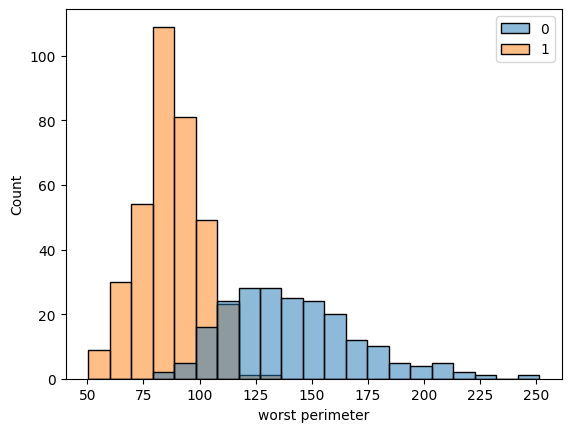

In [9]:
sns.histplot(
    df,
    x= 'worst perimeter',
    hue=y
)

In [10]:
X = np.hstack(
    (np.ones((len(y), 1)), X)
)

In [62]:
#Split the Data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train

array([[ 1.     ,  9.029  , 17.33   , ...,  0.175  ,  0.4228 ,  0.1175 ],
       [ 1.     , 21.09   , 26.57   , ...,  0.2903 ,  0.4098 ,  0.1284 ],
       [ 1.     ,  9.173  , 13.86   , ...,  0.05087,  0.3282 ,  0.0849 ],
       ...,
       [ 1.     , 14.29   , 16.82   , ...,  0.03333,  0.2458 ,  0.0612 ],
       [ 1.     , 13.98   , 19.62   , ...,  0.1827 ,  0.3179 ,  0.1055 ],
       [ 1.     , 12.18   , 20.52   , ...,  0.07431,  0.2694 ,  0.06878]])

In [64]:
y_train

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

# Building a Logistic Regression in Python

In [65]:
class LogisticRregression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None 
        
    def fit(self, X, y):
        num_samples, num_features = X.shape

        #initialize weights and bias
        self.weights = np.zeros(num_features)

        #Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights)
            y_predicted = self.sigmoid(linear_model)

            #updating the weights
            dw = np.dot(X.T, (y_predicted - y))

            self.weights = self.weights - self.learning_rate * dw

    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


    def predict(self, X):
        linear_model = np.dot(X, self.weights)
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if p > 0.5 else 0 for p in y_predicted]

        return y_predicted

In [66]:
model = LogisticRregression()

In [67]:
model.fit(X_train, y_train)

/var/folders/qm/dsdxjcz90xq73hh53x6vlzrh0000gn/T/ipykernel_1081/539873179.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [68]:
y_pred = model.predict(X_test)

/var/folders/qm/dsdxjcz90xq73hh53x6vlzrh0000gn/T/ipykernel_1081/539873179.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [70]:
# measuring the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9473684210526315
